### **GitHub repo link:** https://github.com/dpc43/Data271Project

## **Introduction:**

California is well-known for its high cost of living. Over the last few decades, significant demographic and economic changes point to these costs becoming even higher than they were in the past, especially in relation to other states. For the first time in recent history, for instance, California had a declining population during the pandemic with many citing the increase in housing costs and the cost of living as their primary reasons for leaving (http://www.ppic.org). In addition to high cost of living, wage stagnation and income inequality are among other factors that may be exacerbating the higher costs of living (https://projects.calmatters.org/2018/digging-data-attainable-california-dream-today/).

To explore this issue in more detail, we will analyze U.S. Census data to see if there are any clear patterns, trends, or relationships between cost of living, income distribution, and demographics in California since the 1990's. We may also compare how the cost of living in California has changed compared to other states within the US. The methods we plan to use to analyze the data include descriptive statistics, data visualization, identification of relationships and patterns, and transforming or creating features for further analysis, as needed. 

The analysis will help address this issue by creating a clearer picture of the long-term economic and demographic trends that may be contributing to California becoming an increasingly harder place to live. It may also help point to whether not these trends are likely to continue in the future. Knowing this information could help consumers of our analysis by highlighting specific factors that could be addressed to help prevent this situation from getting worse and to help move towards improving the quality of life in California both now and in the future.

## **Modules:**

These are the modules that will be used for this analsis and the reasons they are necessary:

- **Numpy:** to manipulate data and make calculations efficiently using multi-dimensional arrays
- **Pandas:** to clean, transform, and analyze large datasets using the speed and flexibility of Series and DataFrames
- **Matplotlib:** to enhance control of plot elements when creating data visualizations
- **Seaborn:** to create aesthetically pleasing and informative data visualizations
- **re:** to easily get strings and clean the columns names

In [2]:
# Import Python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## **Data Description**:

<u>**Source:**</u> 
All of the datasets are sourced from IPUMS (Integrated Public Use Microdata Series) USA, an organization that "collects, preserves and harmonizes U.S. census microdata and provides easy access to this data with enhanced documentation. Data includes decennial censuses from 1790 to 2010 and American Community Surveys (ACS) from 2000 to the present." 

Steven Ruggles, Sarah Flood, Matthew Sobek, Daniel Backman, Grace Cooper, Julia A. Rivera Drew, Stephanie Richards, Renae Rodgers, Jonathan Schroeder, and Kari C.W. Williams. IPUMS USA: Version 16.0 Minneapolis, MN: IPUMS, 2025. https://doi.org/10.18128/D010.V16.0

<u>**Original Purpose:**</u> For the purpose of this analysis, two types of surveys were chosen -- the American Community Survey (ACS) 1-year (for the years 2000, 2006, 2011, 2016, 2021, and 2023) and the 1% Metro Sample Survey (for the year 1990 only since there wasn't yet an ACS survey prior to 2000). The purpose of the ACS 1-year surveys are to provide "vital information on a yearly basis about our nation and its people. Information from the survey generates data that help inform how trillions of dollars in federal funds are distributed each year" (https://www.census.gov/programs-surveys/acs/about.html). For example, in addition to general demographic information like age, sex, and race traditionally gathered in the decennial (10-year) census, the ACS surveys sample the population to gather additional information about jobs and occupations, educational attainment, veterans, whether people own or rent their homes, and more. The 1% Metro Sample Survey was a precursor to the ACS surveys, but had a similar purpose and was chosen for this analysis to provide a broader range of data over a longer time span. 

More detailed descriptions of the surveys used can be found here: https://usa.ipums.org/usa/sampdesc.shtml

<u>**Variables:**</u> While it varies by the year the data were collected, there are approximately 90-95 key variables available in the original dataset (https://www.census.gov/programs-surveys/acs/guidance/subjects.html). For this data analysis, the following variables were imported:

| Variable Name | Description | Data Type |
| :-- | :-- | :-- |
| YEAR | The four-digit year when the household was enumerated or included in the census, the ACS, and the PRCS. | int64 |
| SAMPLE | IPUMS sample identifier. Identifies the IPUMS sample from which the case is drawn. Each sample receives a unique 6-digit code. The codes are structured as follows: The first four digits are the year of the census/survey. The next two digits identify the sample within the year. | int64 |
| SERIAL | Household serial number. An identifying number unique to each household record in a given sample. All person records are assigned the same serial number as the household record that they follow. | float64 |
| CBSERIAL | The unique, original identification number assigned to each household record in a given sample by the Census Bureau. All person records are assigned the same serial number as the household record that they follow.  | int64 |
| HHWT | Household weight. Indicates how many households in the U.S. population are represented by a given household in an IPUMS sample. | int64 |
| CLUSTER | Household cluster for variance estimation designed for use with STRATA in Taylor series linear approximation for correction of complex sample design characteristics. | float64 |
| STATEFIP | State (FIPS code). Reports the state in which the household was located, using the Federal Information Processing Standards (FIPS) coding scheme, which orders the states alphabetically. | int64 |
| COUNTYFIP | County (FIPS code, identifiable counties only). Identifies the county where the household was enumerated, using the Federal Information Processing Standard (FIPS) coding scheme. | int64 |
| STRATA | Household strata for variance estimation. Designed for use with CLUSTER in Taylor series linear approximation for correction of complex sample design characteristics. | int64 |
| GQ | Group quarters status. GQ classifies all housing units as falling into one of three main categories: households, group quarters, or vacant units. | int64 |
| OWNERSHP | Ownership of dwelling. Indicates whether the housing unit was rented or owned by its inhabitants. Housing units acquired with a mortgage or other lending arrangement(s) are classified as "owned," even if repayment was not yet completed.| int64 |
| OWNERSHPD | Ownership of dwelling (detailed version). Indicates whether housing unit is owned or being bought, owned free and clear, owned with mortgage or loan, rented, no cash rent, and/or with cash rent. | int64 |
| MORTGAGE | Mortgage status. Indicates whether an owner-occupied housing unit was owned free and clear or was encumbered by a mortgage, loan, or other type of debt. | int64 |
| PROPINSR | Annual property insurance cost (fire, hazard, flood). | int64 |
| RENT | Monthly contract rent expressed in US dollars. | int64 |
| COSTELEC | Annual electricity costs in US dollars. | int64 |
| COSTGAS | Annual gas costs is US dollars. | int64 |
| HHINCOME | Total household income in US dollars. | int64 |
| VALUEH | Value of housing units in US dollars. | int64 |
| COUPLETYPE | Householder couple type. Reports type of relationship the householder shares with their significant other, including both married and unmarried partners in same-sex and opposite-sex relationships. | float64 | int64 |
| NFAMS | Number of families in household. A "family" is any group of persons related by blood, adoption, or marriage. An unrelated individual is considered a separate family. Thus, a household consisting of a widow and her servant contains two families; a household consisting of a large, multiple-generation extended family with no boarders, lodgers, or servants counts as a single family. | int64 |
| PERNUM | Person number in sample unit. Comprised of numbers all persons within each household consecutively in the order in which they appear on the original census or survey form.  | int64 |
| PERWT | Person weight. Indicates how many persons in the U.S. population are represented by a given person in an IPUMS sample. | int64 |
| SEX | Reports whether the person was male or female. | int64 |
| AGE | Age | int64 |
| MARST | Gives each persons current marital status | int64 |
| RACE | Race (broad categories) | int64 |
| RACED | Race (detailed categories)| int64 |
| EDUC | Educational attainment (broad categories). Measured by the highest year of school or degree completed. | int64 |
| EDUCD | Educational attainment (detailed categories). Measured by the highest year of school or degree completed. | int64 |
| EMPSTAT | Employment status. Indicates whether the respondent was a part of the labor force -- working or seeking work -- and, if so, whether the person was currently unemployed. | int64 |
| EMPSTATD | Employment status (detailed version). Indicates whether the respondent was a part of the labor force -- working or seeking work -- and, if so, whether the person was currently unemployed and why. | int64 |
| OCC | Occupation. Reports the person's primary occupation, coded into a contemporary census classification scheme  | int64 |
| IND | Industry. Reports the type of industry in which the person performed an occupation. In census usage, "industry" currently refers to work setting and economic sector, as opposed to the worker's specific technical function, or "occupation". | int64 |
| INCTOT | Total personal income, including each respondent's total pre-tax personal income or losses from all sources for the previous year. | int64 |
| FTOTINC | Total family income, including the total pre-tax money income earned by one's family (as defined by FAMUNIT) from all sources for the previous year.| int64 |
| POVERTY | Poverty status. Reports the total annual income of each person's family expressed as a percentage of their family's poverty threshold, which is determined by the family's size, number of children, and age of the householder. POVERTY assigns all members of each family-not each household-the same value. | int64 |

<u>**Missing Data:**</u> While missing values are an inherant part of collecting survey data, the US Census Bureau imputes data with a series of complex models. More information here: https://www.census.gov/programs-surveys/sipp/methodology/data-editing-and-imputation.html

## **Import/Prepare Data:**

<u>Pre-Import:</u> Because the original dataset was *huge*, it was subsetted by year, survey type, and relevant variables (more information above in data description) prior to importing to help prevent the crashing of the kernel in Jupyter Notebook.

<u>Post-Import:</u> After importing, each dataset was double checked for null and duplicate values. As shown below, this revealed that some datasets had entire columns of missing data, likely due to those variables not being gathered during that particular year.

<u>CAUTION:</u> Even after subsetting, if all of the datasets are imported at once, it may crash the kernel. I'm currently looking into some ways to resolve this issue, but haven't found a good solution yet.

**Import 1990 1% Metro Sample Survey:**

In [2]:
cali_1990_Metro1 = pd.read_csv('CA_Census_1990_Metro1.csv')
cali_1990_Metro1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,1990,199002,46452,NaN,52,1.990000e+12,6,0,57,1,...,700,0,2,3,30,0,0,3984,3984,53
1,1990,199002,46452,NaN,52,1.990000e+12,6,0,57,1,...,326,4,40,3,30,0,0,0,3984,53
2,1990,199002,46453,NaN,91,1.990000e+12,6,0,44,1,...,100,2,20,1,10,479,10,860,860,13
3,1990,199002,46454,NaN,117,1.990000e+12,6,0,53,1,...,100,3,30,3,30,0,0,13535,16929,226
4,1990,199002,46454,NaN,117,1.990000e+12,6,0,53,1,...,100,5,50,3,30,0,0,3394,16929,226


In [3]:
# Check number of rows and columns
cali_1990_Metro1.shape

(290968, 37)

In [4]:
# Check for missing values
cali_1990_Metro1.isna().sum()[cali_1990_Metro1.isna().sum() > 0]

CBSERIAL      290968
COUPLETYPE    290968
dtype: int64

In [5]:
# Check for duplicate values
cali_1990_Metro1.duplicated().sum()

np.int64(0)

Convert any datatypes that don't make logical sense

In [6]:
#inspect the dataframe first to see the types
cali_1990_Metro1.info()
#datatypes are already appropriate no changes necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290968 entries, 0 to 290967
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        290968 non-null  int64  
 1   SAMPLE      290968 non-null  int64  
 2   SERIAL      290968 non-null  int64  
 3   CBSERIAL    0 non-null       float64
 4   HHWT        290968 non-null  int64  
 5   CLUSTER     290968 non-null  float64
 6   STATEFIP    290968 non-null  int64  
 7   COUNTYFIP   290968 non-null  int64  
 8   STRATA      290968 non-null  int64  
 9   GQ          290968 non-null  int64  
 10  OWNERSHP    290968 non-null  int64  
 11  OWNERSHPD   290968 non-null  int64  
 12  MORTGAGE    290968 non-null  int64  
 13  PROPINSR    290968 non-null  int64  
 14  RENT        290968 non-null  int64  
 15  COSTELEC    290968 non-null  int64  
 16  COSTGAS     290968 non-null  int64  
 17  HHINCOME    290968 non-null  int64  
 18  VALUEH      290968 non-null  int64  
 19  CO

In [7]:
#clean up the columns names by applying snake case format and renaming some columns to make them more clear
cali_1990_Metro1.columns=cali_1990_Metro1.columns.str.lower()
cali_1990_Metro1=cali_1990_Metro1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'
    
})
cali_1990_Metro1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes


In [8]:
cali_1990_Metro1.to_csv('Cleaned_CA_Census_1990.csv', index=False)

**Import ACS 2000 1-Year Data:**

In [9]:
cali_2000_ACS1 = pd.read_csv('CA_Census_2000_ACS1.csv')
cali_2000_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2000,200004,7,NaN,600,2.000000e+12,6,NaN,6,1,...,100,10,101,1,10,330,819,52000,177000,501
1,2000,200004,7,NaN,600,2.000000e+12,6,NaN,6,1,...,100,11,114,1,10,260,657,125000,177000,501
2,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,6,62,1,10,524,639,6000,6000,44
3,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,0,1,0,0,0,0,9999999,6000,44
4,2000,200004,21,NaN,1800,2.000000e+12,6,NaN,6,1,...,700,1,10,0,0,0,0,9999999,6000,44


In [10]:
# Check number of rows and columns
cali_2000_ACS1.shape

(38143, 37)

In [11]:
# Check for missing values
cali_2000_ACS1.isna().sum()[cali_2000_ACS1.isna().sum() > 0]

CBSERIAL      38143
COUNTYFIP     38143
COUPLETYPE    38143
dtype: int64

In [12]:
# Check for duplicate values
cali_2000_ACS1.duplicated().sum()

np.int64(0)

In [13]:
#inspect the dataframe first to see the types
cali_2000_ACS1.info()
#datatypes are already appropriate no changes necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38143 entries, 0 to 38142
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   YEAR        38143 non-null  int64  
 1   SAMPLE      38143 non-null  int64  
 2   SERIAL      38143 non-null  int64  
 3   CBSERIAL    0 non-null      float64
 4   HHWT        38143 non-null  int64  
 5   CLUSTER     38143 non-null  float64
 6   STATEFIP    38143 non-null  int64  
 7   COUNTYFIP   0 non-null      float64
 8   STRATA      38143 non-null  int64  
 9   GQ          38143 non-null  int64  
 10  OWNERSHP    38143 non-null  int64  
 11  OWNERSHPD   38143 non-null  int64  
 12  MORTGAGE    38143 non-null  int64  
 13  PROPINSR    38143 non-null  int64  
 14  RENT        38143 non-null  int64  
 15  COSTELEC    38143 non-null  int64  
 16  COSTGAS     38143 non-null  int64  
 17  HHINCOME    38143 non-null  int64  
 18  VALUEH      38143 non-null  int64  
 19  COUPLETYPE  0 non-null   

In [14]:
#clean up the columns names by applying snake case format and renaming some columns to make them more clear
cali_2000_ACS1.columns=cali_2000_ACS1.columns.str.lower()
cali_2000_ACS1=cali_2000_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2000_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes

In [15]:
cali_2000_ACS1.to_csv('Cleaned_CA_Census_2000.csv', index=False)

**Import ACS 2006 1-Year Data:**

In [16]:
cali_2006_ACS1 = pd.read_csv('CA_Census_2006_ACS1.csv')
cali_2006_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2006,200601,65922,1,113,2.006000e+12,6,85,271006,1,...,100,6,62,2,20,9120,6180,41500,45700,381
1,2006,200601,65922,1,113,2.006000e+12,6,85,271006,1,...,100,2,21,3,30,5700,7690,4200,45700,381
2,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,7,71,1,10,5700,7590,14880,23880,119
3,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,1,10,0,0,0,0,9999999,23880,119
4,2006,200601,65923,2,65,2.006000e+12,6,37,541606,1,...,100,1,10,0,0,0,0,9999999,23880,119


In [17]:
# Check number of rows and columns
cali_2006_ACS1.shape

(345723, 37)

In [18]:
# Check for missing values
cali_2006_ACS1.isna().sum()[cali_2006_ACS1.isna().sum() > 0]

COUPLETYPE    345723
dtype: int64

In [19]:
# Check for duplicate values
cali_2006_ACS1.duplicated().sum()

np.int64(0)

In [20]:
#inspect the dataframe first to see the types
cali_2006_ACS1.info()
#datatypes are already appropriate no changes necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345723 entries, 0 to 345722
Data columns (total 37 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   YEAR        345723 non-null  int64  
 1   SAMPLE      345723 non-null  int64  
 2   SERIAL      345723 non-null  int64  
 3   CBSERIAL    345723 non-null  int64  
 4   HHWT        345723 non-null  int64  
 5   CLUSTER     345723 non-null  float64
 6   STATEFIP    345723 non-null  int64  
 7   COUNTYFIP   345723 non-null  int64  
 8   STRATA      345723 non-null  int64  
 9   GQ          345723 non-null  int64  
 10  OWNERSHP    345723 non-null  int64  
 11  OWNERSHPD   345723 non-null  int64  
 12  MORTGAGE    345723 non-null  int64  
 13  PROPINSR    345723 non-null  int64  
 14  RENT        345723 non-null  int64  
 15  COSTELEC    345723 non-null  int64  
 16  COSTGAS     345723 non-null  int64  
 17  HHINCOME    345723 non-null  int64  
 18  VALUEH      345723 non-null  int64  
 19  CO

In [21]:
#clean up the columns names by applying snake case format and renaming some columns to make them more clear
cali_2006_ACS1.columns=cali_2006_ACS1.columns.str.lower()
cali_2006_ACS1=cali_2006_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2006_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'coupletype', 'family_num', 'person_num', 'person_wt',
       'sex', 'age', 'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat',
       'empl_statd', 'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes



In [22]:
cali_2006_ACS1.to_csv('Cleaned_CA_Census_2006.csv', index=False)

**Import ACS 2011 1-Year Data:**

In [23]:
cali_2011_ACS1 = pd.read_csv('CA_Census_2011_ACS1.csv')
cali_2011_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2011,201101,66400,9,55.0,2011000664001,6,0,80006,1,...,700,6,63,1,10,3645,8090,24000,74000,500
1,2011,201101,66400,9,55.0,2011000664001,6,0,80006,1,...,700,6,65,1,10,9130,4580,50000,74000,500
2,2011,201101,66401,13,36.0,2011000664011,6,37,611306,1,...,700,6,65,1,10,5700,6990,29300,29300,255
3,2011,201101,66402,33,54.0,2011000664021,6,0,80006,1,...,610,6,61,1,10,4720,4980,12600,12600,85
4,2011,201101,66402,33,54.0,2011000664021,6,0,80006,1,...,100,5,50,3,30,0,0,0,12600,85


In [24]:
# Check number of rows and columns
cali_2011_ACS1.shape

(368809, 36)

In [25]:
# Check for missing values
cali_2011_ACS1.isna().sum()[cali_2011_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [26]:
# Check for duplicate values
cali_2011_ACS1.duplicated().sum()

np.int64(0)

In [27]:
#inspect the dataframe first to see the types
cali_2011_ACS1.info()
#datatypes are already appropriate no changes necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368809 entries, 0 to 368808
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       368809 non-null  int64  
 1   SAMPLE     368809 non-null  int64  
 2   SERIAL     368809 non-null  int64  
 3   CBSERIAL   368809 non-null  int64  
 4   HHWT       368809 non-null  float64
 5   CLUSTER    368809 non-null  int64  
 6   STATEFIP   368809 non-null  int64  
 7   COUNTYFIP  368809 non-null  int64  
 8   STRATA     368809 non-null  int64  
 9   GQ         368809 non-null  int64  
 10  OWNERSHP   368809 non-null  int64  
 11  OWNERSHPD  368809 non-null  int64  
 12  MORTGAGE   368809 non-null  int64  
 13  PROPINSR   368809 non-null  int64  
 14  RENT       368809 non-null  int64  
 15  COSTELEC   368809 non-null  int64  
 16  COSTGAS    368809 non-null  int64  
 17  HHINCOME   368809 non-null  int64  
 18  VALUEH     368809 non-null  int64  
 19  NFAMS      368809 non-n

In [28]:
#clean up the columns names by applying snake case format and renaming some columns to make them more clear
cali_2011_ACS1.columns=cali_2011_ACS1.columns.str.lower()
cali_2011_ACS1=cali_2011_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2011_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes

In [29]:
cali_2011_ACS1.to_csv('Cleaned_CA_Census_2011.csv', index=False)

**Import ACS 2016 1-Year Data:**

In [30]:
cali_2016_ACS1 = pd.read_csv('CA_Census_2016_ACS1.csv')
cali_2016_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2016,201601,67752,33,102,2.016000e+12,6,107,1070206,1,...,976,8,81,3,30,0,0,20000,54000,375
1,2016,201601,67752,33,102,2.016000e+12,6,107,1070206,1,...,865,6,65,3,30,0,0,34000,54000,375
2,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,801,7,71,1,10,4760,5080,14300,41500,223
3,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,100,6,63,1,10,4760,4770,15700,41500,223
4,2016,201601,67753,36,122,2.016000e+12,6,65,651406,1,...,801,6,65,2,20,4760,5080,11500,41500,223


In [31]:
# Check number of rows and columns
cali_2016_ACS1.shape

(376035, 36)

In [32]:
# Check for missing values
cali_2016_ACS1.isna().sum()[cali_2016_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [33]:
# Check for duplicate values
cali_2016_ACS1.duplicated().sum()

np.int64(0)

In [34]:
#inspect the dataframe first to see the types
cali_2016_ACS1.info()
#datatypes are already appropriate no changes necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376035 entries, 0 to 376034
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       376035 non-null  int64  
 1   SAMPLE     376035 non-null  int64  
 2   SERIAL     376035 non-null  int64  
 3   CBSERIAL   376035 non-null  int64  
 4   HHWT       376035 non-null  int64  
 5   CLUSTER    376035 non-null  float64
 6   STATEFIP   376035 non-null  int64  
 7   COUNTYFIP  376035 non-null  int64  
 8   STRATA     376035 non-null  int64  
 9   GQ         376035 non-null  int64  
 10  OWNERSHP   376035 non-null  int64  
 11  OWNERSHPD  376035 non-null  int64  
 12  MORTGAGE   376035 non-null  int64  
 13  PROPINSR   376035 non-null  int64  
 14  RENT       376035 non-null  int64  
 15  COSTELEC   376035 non-null  int64  
 16  COSTGAS    376035 non-null  int64  
 17  HHINCOME   376035 non-null  int64  
 18  VALUEH     376035 non-null  int64  
 19  NFAMS      376035 non-n

In [35]:
#clean up the columns names by applying snake case format and renaming some columns to make them more clear
cali_2016_ACS1.columns=cali_2016_ACS1.columns.str.lower()
cali_2016_ACS1=cali_2016_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2016_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes

In [36]:
cali_2016_ACS1.to_csv('Cleaned_CA_Census_2016.csv', index=False)


**Import ACS 2021 1-Year Data:**

In [37]:
cali_2021_ACS1 = pd.read_csv('CA_Census_2021_ACS1.csv')
cali_2021_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2021,202101,71725,2.021010e+12,177,2.021000e+12,6,37,374106,4,...,100,0,2,3,30,0,0,15000,9999999,0
1,2021,202101,71726,2.021010e+12,14,2.021000e+12,6,111,1110206,3,...,100,10,101,3,30,0,0,14800,9999999,0
2,2021,202101,71727,2.021010e+12,14,2.021000e+12,6,67,671206,4,...,100,6,63,3,30,0,0,11300,9999999,0
3,2021,202101,71728,2.021010e+12,19,2.021000e+12,6,55,550006,4,...,100,10,101,3,30,2633,9570,14000,9999999,0
4,2021,202101,71729,2.021010e+12,17,2.021000e+12,6,37,373506,4,...,100,8,81,2,20,4760,5170,7600,9999999,0


In [38]:
# Check number of rows and columns
cali_2021_ACS1.shape

(386061, 36)

In [39]:
# Check for missing values
cali_2021_ACS1.isna().sum()[cali_2021_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [40]:
# Check for duplicate values
cali_2021_ACS1.duplicated().sum()

np.int64(0)

In [41]:
#inspect the dataframe first to see the types
cali_2021_ACS1.info()
#datatypes are already appropriate no changes necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386061 entries, 0 to 386060
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       386061 non-null  int64  
 1   SAMPLE     386061 non-null  int64  
 2   SERIAL     386061 non-null  int64  
 3   CBSERIAL   386061 non-null  float64
 4   HHWT       386061 non-null  int64  
 5   CLUSTER    386061 non-null  float64
 6   STATEFIP   386061 non-null  int64  
 7   COUNTYFIP  386061 non-null  int64  
 8   STRATA     386061 non-null  int64  
 9   GQ         386061 non-null  int64  
 10  OWNERSHP   386061 non-null  int64  
 11  OWNERSHPD  386061 non-null  int64  
 12  MORTGAGE   386061 non-null  int64  
 13  PROPINSR   386061 non-null  int64  
 14  RENT       386061 non-null  int64  
 15  COSTELEC   386061 non-null  int64  
 16  COSTGAS    386061 non-null  int64  
 17  HHINCOME   386061 non-null  int64  
 18  VALUEH     386061 non-null  int64  
 19  NFAMS      386061 non-n

In [42]:
#clean up the columns names by applying snake case format and renaming some columns to make them more clear
cali_2021_ACS1.columns=cali_2021_ACS1.columns.str.lower()
cali_2021_ACS1=cali_2021_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2021_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes

In [43]:
cali_2021_ACS1.to_csv('Cleaned_CA_Census_2021.csv', index=False)


**Import ACS 2023 1-Year Data:**

In [44]:
cali_2023_ACS1 = pd.read_csv('CA_Census_2023_ACS1.csv')
cali_2023_ACS1.head()

,YEAR,SAMPLE,SERIAL,CBSERIAL,HHWT,CLUSTER,STATEFIP,COUNTYFIP,STRATA,GQ,...,RACED,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC,IND,INCTOT,FTOTINC,POVERTY
0,2023,202301,76841,2023010000009,85.0,2023000768411,6,59,592406,4,...,700,7,71,1,10,4055,8680,3600,9999999,0
1,2023,202301,76842,2023010000028,60.0,2023000768421,6,85,851506,4,...,100,7,71,1,10,2850,8564,800,9999999,0
2,2023,202301,76843,2023010000030,27.0,2023000768431,6,25,250006,3,...,200,4,40,3,30,0,0,0,9999999,0
3,2023,202301,76844,2023010000033,23.0,2023000768441,6,59,591606,4,...,100,10,101,3,30,0,0,2700,9999999,0
4,2023,202301,76845,2023010000052,51.0,2023000768451,6,81,810606,4,...,100,8,81,1,10,2850,8564,1800,9999999,0


In [45]:
# Check number of rows and columns
cali_2023_ACS1.shape

(392318, 36)

In [46]:
# Check for missing values
cali_2023_ACS1.isna().sum()[cali_2023_ACS1.isna().sum() > 0]

Series([], dtype: int64)

In [47]:
# Check for duplicate values
cali_2023_ACS1.duplicated().sum()

np.int64(0)

In [48]:
#inspect the dataframe first to see the types
cali_2023_ACS1.info()
#datatypes are already appropriate no changes necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392318 entries, 0 to 392317
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       392318 non-null  int64  
 1   SAMPLE     392318 non-null  int64  
 2   SERIAL     392318 non-null  int64  
 3   CBSERIAL   392318 non-null  int64  
 4   HHWT       392318 non-null  float64
 5   CLUSTER    392318 non-null  int64  
 6   STATEFIP   392318 non-null  int64  
 7   COUNTYFIP  392318 non-null  int64  
 8   STRATA     392318 non-null  int64  
 9   GQ         392318 non-null  int64  
 10  OWNERSHP   392318 non-null  int64  
 11  OWNERSHPD  392318 non-null  int64  
 12  MORTGAGE   392318 non-null  int64  
 13  PROPINSR   392318 non-null  int64  
 14  RENT       392318 non-null  int64  
 15  COSTELEC   392318 non-null  int64  
 16  COSTGAS    392318 non-null  int64  
 17  HHINCOME   392318 non-null  int64  
 18  VALUEH     392318 non-null  int64  
 19  NFAMS      392318 non-n

In [49]:
#clean up the columns names by applying snake case format and renaming some columns to make them more clear
cali_2023_ACS1.columns=cali_2023_ACS1.columns.str.lower()
cali_2023_ACS1=cali_2023_ACS1.rename(columns={
    'hhwt':'hh_wt',
    'statefip':'state_fip',
    'county_fip':'county_fip',
    'gq':'group_quarters',
    'propinsr':'prop_insr',
    'costelec':'cost_elec',
    'costgas':'cost_gas',
    'hhincome':'hh_income',
    'valueh':'house_val',
    'nfams':'family_num',
    'hhwt':'hh_wt',
    'pernum':'person_num',
    'perwt':'person_wt',
    'empstat':'emp_stat',
    'empstatd':'empl_statd'  
})
cali_2023_ACS1.columns

Index(['year', 'sample', 'serial', 'cbserial', 'hh_wt', 'cluster', 'state_fip',
       'countyfip', 'strata', 'group_quarters', 'ownershp', 'ownershpd',
       'mortgage', 'prop_insr', 'rent', 'cost_elec', 'cost_gas', 'hh_income',
       'house_val', 'family_num', 'person_num', 'person_wt', 'sex', 'age',
       'marst', 'race', 'raced', 'educ', 'educd', 'emp_stat', 'empl_statd',
       'occ', 'ind', 'inctot', 'ftotinc', 'poverty'],
      dtype='object')

Add the cleaned file to the directory so we can make a combined dataframe for analysis purposes

In [50]:
cali_2023_ACS1.to_csv('Cleaned_CA_Census_2023.csv', index=False)

**Import the cleaned individual csv files and combine them into one new file**

In [6]:
dataset_names=['Cleaned_CA_Census_2000.csv','Cleaned_CA_Census_2021.csv','Cleaned_CA_Census_2016.csv','Cleaned_CA_Census_2011.csv','Cleaned_CA_Census_2006.csv','Cleaned_CA_Census_2023.csv','Cleaned_CA_Census_1990.csv']

dataframes = []
for name in dataset_names:
    print("Loading", name)
    df = pd.read_csv(name)
    dataframes.append(df)

# Concatenate all DataFrames vertically
combined_df = pd.concat(dataframes, ignore_index=True)

# Save to a single CSV
combined_df.to_csv('combined_census_data.csv', index=False)
print("Success, all datasets merged!")

Loading Cleaned_CA_Census_2000.csv
Loading Cleaned_CA_Census_2021.csv
Loading Cleaned_CA_Census_2016.csv
Loading Cleaned_CA_Census_2011.csv
Loading Cleaned_CA_Census_2006.csv
Loading Cleaned_CA_Census_2023.csv
Loading Cleaned_CA_Census_1990.csv
Success, all datasets merged!


<h3>Inspect the data to make sure the data cleaning worked and the datasets are all properly combined</h3>

Checking the number of rows and columns for the full dataset

In [3]:
census_data = pd.read_csv('combined_census_data.csv')

In [4]:
census_data.head()

,year,sample,serial,cbserial,hh_wt,cluster,state_fip,countyfip,strata,group_quarters,...,raced,educ,educd,emp_stat,empl_statd,occ,ind,inctot,ftotinc,poverty
0,2000,200004,7,NaN,600.0,2.000000e+12,6,NaN,6,1,...,100,10,101,1,10,330,819,52000,177000,501
1,2000,200004,7,NaN,600.0,2.000000e+12,6,NaN,6,1,...,100,11,114,1,10,260,657,125000,177000,501
2,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,6,62,1,10,524,639,6000,6000,44
3,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,0,1,0,0,0,0,9999999,6000,44
4,2000,200004,21,NaN,1800.0,2.000000e+12,6,NaN,6,1,...,700,1,10,0,0,0,0,9999999,6000,44


In [5]:
census_data.shape

(2198057, 37)

**Do any final data cleaning steps**

In [6]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198057 entries, 0 to 2198056
Data columns (total 37 columns):
 #   Column          Dtype  
---  ------          -----  
 0   year            int64  
 1   sample          int64  
 2   serial          int64  
 3   cbserial        float64
 4   hh_wt           float64
 5   cluster         float64
 6   state_fip       int64  
 7   countyfip       float64
 8   strata          int64  
 9   group_quarters  int64  
 10  ownershp        int64  
 11  ownershpd       int64  
 12  mortgage        int64  
 13  prop_insr       int64  
 14  rent            int64  
 15  cost_elec       int64  
 16  cost_gas        int64  
 17  hh_income       int64  
 18  house_val       int64  
 19  coupletype      float64
 20  family_num      int64  
 21  person_num      int64  
 22  person_wt       float64
 23  sex             int64  
 24  age             int64  
 25  marst           int64  
 26  race            int64  
 27  raced           int64  
 28  educ        

In [7]:
census_data.duplicated().sum()

np.int64(0)

In [8]:
census_data.isna().sum()[census_data.isna().sum() > 0]

cbserial       329111
countyfip       38143
coupletype    2198057
dtype: int64

In [9]:
#drop coupletype column as it only contains null values
census_data=census_data.drop(columns='coupletype')
census_data.shape

(2198057, 36)

In [10]:
#check for any columns that aren't useful (contain only one value)
(census_data.nunique()==1)[census_data.nunique()== 1]

state_fip    True
dtype: bool

In [11]:
census_data=census_data.drop(columns='state_fip')
census_data.shape

(2198057, 35)

will work with these four columns to clearly see how costs have changed over time 
PROPINSR	Annual property insurance cost (fire, hazard, flood).	int64
RENT	Monthly contract rent expressed in US dollars.	int64
COSTELEC	Annual electricity costs in US dollars.	int64
COSTGAS	Annual gas costs is US dollars.

In [12]:
census_bill_data=census_data[['year','cost_elec','cost_gas','rent','prop_insr']]
census_bill_data.head()

,year,cost_elec,cost_gas,rent,prop_insr
0,2000,360,480,770,0
1,2000,360,480,770,0
2,2000,480,480,1000,0
3,2000,480,480,1000,0
4,2000,480,480,1000,0


In [13]:
census_bill_sum=census_bill_data.groupby('year').mean()
census_bill_sum=census_bill_sum.reset_index()
census_bill_sum

,year,cost_elec,cost_gas,rent,prop_insr
0,1990,1122.380520,1815.814416,231.992480,261.154522
1,2000,1387.743020,2731.692578,284.056970,419.058097
2,2006,1642.818794,2725.937386,330.724366,627.012551
3,2011,1659.167908,2766.578462,424.146797,557.779772
4,2016,1862.033250,3361.847605,510.692170,631.583049
5,2021,2261.809693,3424.863615,603.647263,821.523101
6,2023,2716.983613,3658.034763,652.375043,1007.287318


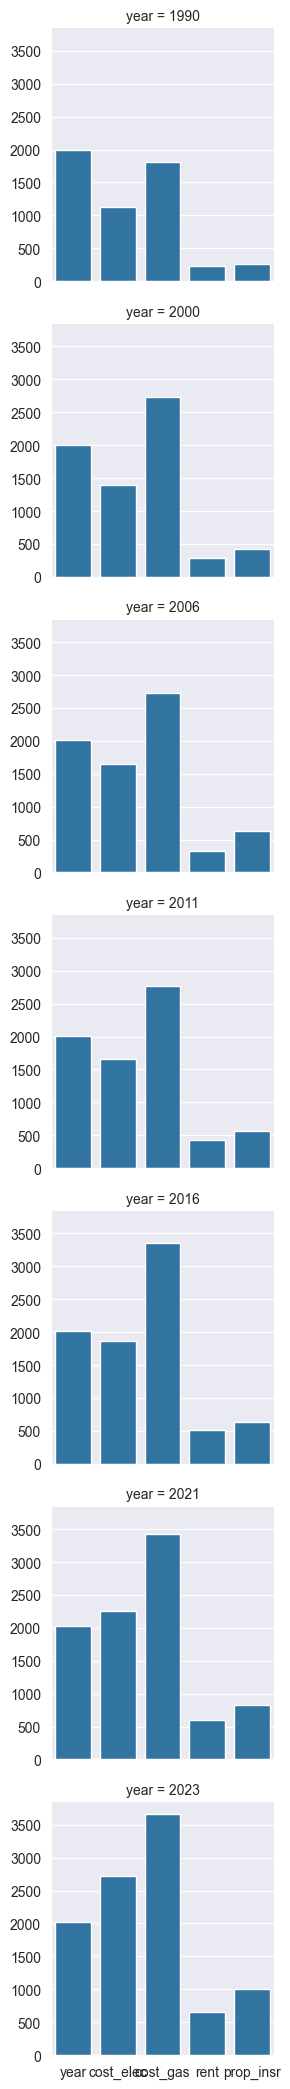

In [14]:

c=sns.FacetGrid(data=census_bill_sum,row='year')
census_bills_sum=c.map_dataframe(sns.barplot)

In [15]:
#visualize the occupation types and then look at the highest paying jobs for each year
#https://usa.ipums.org/usa/volii/occ2000.shtml
census_data['occ']


0          330
1          260
2          524
3            0
4            0
          ... 
2198052      0
2198053      0
2198054    354
2198055    678
2198056    274
Name: occ, Length: 2198057, dtype: int64

In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
page=requests.get('https://usa.ipums.org/usa/volii/occ2000.shtml')
page

<Response [200]>

In [18]:
page_text=page.text
page_text
soup=BeautifulSoup(page_text)
#soup

In [19]:
#get the first td element since thats the 1% version which we used
table1_code=soup.find_all('table')[1]

In [37]:
nested_list = []  
# Create a nested list of data
for i in table1_code.find_all('tr'):
  row_i=[]
  for j in i.find_all('td'):
     row_i.append(j.text)
  nested_list.append(row_i)

# Put the data in a Pandas dataframe and rename columns as needed
table1_df = pd.DataFrame(nested_list)
table1_df=table1_df.drop(columns=1)
table1_df=table1_df.rename(columns={
    0:'occ',
    2:'job_type'})
table1_df

,occ,job_type
0,None,None
1,None,None
2,000,"N/A (Under 16 years or not in the labor force,..."
3,None,None
4,None,None
...,...,...
540,981,First-Line Enlisted Military Supervisors/Managers
541,982,Military Enlisted Tactical Operations and Air/...
542,983,"Military, Rank Not Specified (Census only)"
543,None,None


In [49]:
table1_df=table1_df.dropna()
table1_df=table1_df.reset_index(drop=True)

In [50]:
len(table1_code.find_all('td'))

1533

In [52]:
array_occ = [str(i).zfill(3) for i in range(993)]
full_df = pd.DataFrame({'occ': array_occ})
table1_df['occ'] = table1_df['occ'].astype(int)
full_df['occ'] = full_df['occ'].astype(int)
table1_df = full_df.merge(table1_df, on='occ', how='left')
table1_df

,occ,job_type
0,0,"N/A (Under 16 years or not in the labor force,..."
1,1,Chief Executives
2,2,General and Operations Managers
3,3,Legislators
4,4,Advertising and Promotions Managers
...,...,...
988,988,NaN
989,989,NaN
990,990,NaN
991,991,NaN


In [68]:
def map_occ_cat_spec(occ_code):

    if occ_code == '0':
        return 'N/A (Under 16 years or not in the labor force)'
    elif 1 <= int(occ_code) <= 43:
        return 'Management Occupations'
    elif 50 <= int(occ_code) <= 73:
        return 'Business Operations Specialists'
    elif 80 <= int(occ_code) <= 95:
        return 'Financial Specialists'
    elif 100 <= int(occ_code) <= 124:
        return 'Computer and Mathematical Occupations'
    elif 130 <= int(occ_code) <= 156:
        return 'Architecture and Engineering Occupations'
    elif 100 <= int(occ_code) <= 159:
        return 'Construction, Extraction and Maintenance'
    elif 160 <= int(occ_code) <= 196:
        return 'Life, Physical, and Social Science Occupations'
    elif 200 <= int(occ_code) <= 206:
        return 'Community and Social Services Occupations'
    elif 210 <= int(occ_code) <= 215:
        return 'Legal Occupations'
    elif 220 <= int(occ_code) <= 255:
        return 'Education, Training, and Library Occupations'
    elif 260 <= int(occ_code) <= 296:
        return 'Arts, Design, Entertainment, Sports, and Media Occupations'
    elif 300 <= int(occ_code) <= 354:
        return 'Legal Occupations'
    elif 300 <= int(occ_code) <= 354:
        return 'Healthcare Practitioners and Technical Occupations'
    elif 360 <= int(occ_code) <= 365:
        return 'Healthcare Support Occupations'
    elif 370 <= int(occ_code) <= 395:
        return 'Protective Service Occupations'
    elif 400 <= int(occ_code) <= 416:
        return 'Food Preparation and Serving Occupations'
    elif 420 <= int(occ_code) <= 425:
        return 'Building and Grounds Cleaning and Maintenance Occupations'
    elif 430 <= int(occ_code) <= 465:
        return 'Personal Care and Service Occupations'
    elif 470 <= int(occ_code) <= 496:
        return 'Sales Occupations'
    elif 500 <= int(occ_code) <= 593:
        return 'Office and Administrative Support Occupations'
    elif 600 <= int(occ_code) <= 613:
        return 'Farming, Fishing, and Forestry Occupations'
    elif 620 <= int(occ_code) <= 676:
        return 'Construction Trades'
    elif 680 <= int(occ_code) <= 694:
        return 'Extraction Workers'
    elif 700 <= int(occ_code) <= 762:
        return 'Installation, Maintenance, and Repair Workers'
    elif 770 <= int(occ_code) <= 896:
        return 'Production Occupations'
    elif 900 <= int(occ_code) <= 975:
        return 'Transportation and Material Moving Occupations'
    elif 980 <= int(occ_code) <= 983:
        return 'Military Specific Occupations'
    elif int(occ_code) == 992:
        return 'Unemployed'
    
    else:
        return 'N/A'

In [64]:
table1_df['occ_cat']=table1_df['occ']
table1_df

table1_df['occ_cat'] = table1_df['occ'].apply(map_occ_cat_spec)
table1_df

,occ,job_type,occ_cat
0,0,"N/A (Under 16 years or not in the labor force,...",N/A
1,1,Chief Executives,Management Occupations
2,2,General and Operations Managers,Management Occupations
3,3,Legislators,Management Occupations
4,4,Advertising and Promotions Managers,Management Occupations
...,...,...,...
988,988,NaN,N/A
989,989,NaN,N/A
990,990,NaN,N/A
991,991,NaN,N/A


In [65]:
#census_data_w_occ=census_data[['occ','year']].copy()
census_data_w_occ=census_data.copy()


In [66]:
census_data_w_occ=census_data_w_occ.merge(table1_df,)
census_data_w_occ

,year,sample,serial,cbserial,hh_wt,cluster,countyfip,strata,group_quarters,ownershp,...,educd,emp_stat,empl_statd,occ,ind,inctot,ftotinc,poverty,job_type,occ_cat
0,2000,200004,7,NaN,600.0,2.000000e+12,NaN,6,1,2,...,101,1,10,330,819,52000,177000,501,Clinical Laboratory Technologists and Technicians,Legal Occupations
1,2000,200004,7,NaN,600.0,2.000000e+12,NaN,6,1,2,...,114,1,10,260,657,125000,177000,501,Artists and Related Workers,"Arts, Design, Entertainment, Sports, and Media..."
2,2000,200004,21,NaN,1800.0,2.000000e+12,NaN,6,1,2,...,62,1,10,524,639,6000,6000,44,Customer Service Representatives,Office and Administrative Support Occupations
3,2000,200004,21,NaN,1800.0,2.000000e+12,NaN,6,1,2,...,1,0,0,0,0,9999999,6000,44,"N/A (Under 16 years or not in the labor force,...",N/A
4,2000,200004,21,NaN,1800.0,2.000000e+12,NaN,6,1,2,...,10,0,0,0,0,9999999,6000,44,"N/A (Under 16 years or not in the labor force,...",N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272600,1990,199002,162794,NaN,91.0,1.990000e+12,77.0,96,1,1,...,20,0,0,0,0,9999999,46300,313,"N/A (Under 16 years or not in the labor force,...",N/A
1272601,1990,199002,162794,NaN,91.0,1.990000e+12,77.0,96,1,1,...,20,0,0,0,0,9999999,46300,313,"N/A (Under 16 years or not in the labor force,...",N/A
1272602,1990,199002,162795,NaN,52.0,1.990000e+12,77.0,56,1,1,...,82,1,10,354,412,31490,31490,488,Other Healthcare Practitioners and Technical O...,Legal Occupations
1272603,1990,199002,162796,NaN,39.0,1.990000e+12,77.0,68,1,2,...,62,1,10,678,840,27000,27000,325,NaN,N/A


In [67]:
test=table1_df.copy()
test

,occ,job_type,occ_cat
0,0,"N/A (Under 16 years or not in the labor force,...",N/A
1,1,Chief Executives,Management Occupations
2,2,General and Operations Managers,Management Occupations
3,3,Legislators,Management Occupations
4,4,Advertising and Promotions Managers,Management Occupations
...,...,...,...
988,988,NaN,N/A
989,989,NaN,N/A
990,990,NaN,N/A
991,991,NaN,N/A


In [85]:
census_data_w_occ_sub=census_data_w_occ[['occ_cat','job_type']]
census_data_w_occ_sub.dtypes

occ_cat     object
job_type    object
dtype: object

In [86]:
census_data_w_occ_sub.groupby('occ_cat').count()

,job_type
occ_cat,
Architecture and Engineering Occupations,11047
"Arts, Design, Entertainment, Sports, and Media Occupations",9019
Building and Grounds Cleaning and Maintenance Occupations,4110
Business Operations Specialists,9711
Community and Social Services Occupations,3103
Computer and Mathematical Occupations,13891
Construction Trades,8683
"Construction, Extraction and Maintenance",0
"Education, Training, and Library Occupations",20703
